# Simple Autoencoder

We will use MNIST dataset and keras library to create simple autoencoder

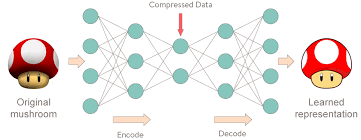

In [1]:
from IPython.display import Image
Image("autoencoder1.png")

# 1)-Importing key modules

In [2]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# For data processing and maths
import numpy as np
import pandas as pd
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
# for deep learning

import tensorflow as tf
from keras.layers import Input, Dense # dense or fully connected layer
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,keras,tensorflow,numpy,seaborn, matplotlib

Software versions
Python 3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.4.0
OS Windows 10 10.0.16299 SP0
pandas 0.23.4
keras 2.2.4
tensorflow 1.13.1
numpy 1.16.2
seaborn 0.9.0
matplotlib 2.1.0
Thu Oct 10 14:31:11 2019 W. Europe Daylight Time

# 2)- Loading dataset 

In [6]:
(X_train, _), (X_test, _) = mnist.load_data()

In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Our input image has a dimension of 784, we will encode it to 32 and the decode it back to the original dimension of 784

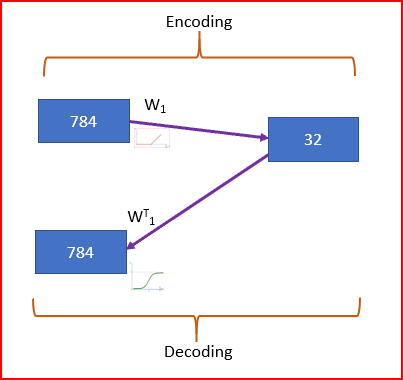

In [10]:
Image("autoencode2.png")

In [11]:
encoding_dim=32
input_img= Input(shape=(784,))

**encoded layer**

We now create the encoder and the decoder based on the figure above.<br>
Input image will be Encoded to 32 units and the activation will be relu and the input is the tensors of input image

In [12]:
encoded = Dense(units=32, activation='relu')(input_img)

Instructions for updating:
Colocations handled automatically by placer.


**decoded layer**

Decoder will have 784 units as it needs to reconstruct the input image back to its original dimension.<br>
As decoded is the output layer of the autoencoder we will use sigmoid activation function. encoded image will be the input to the decoder

In [13]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

# 3)- Build Autoencoder Model

create the autoencoder with input as the input image and output as the decoder

In [14]:
autoencoder=Model(input_img, decoded)

In [15]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### 3a)- Build encoder Model

We can also extract the encoder which takes input as input images and the output is the encoded image.

In [16]:
encoder = Model(input_img, encoded)

In [17]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [18]:
encoded_input=Input(shape=(encoding_dim,))

In [19]:
decoder_layer=autoencoder.layers[-1]

### 3b)-Build Decoder Model

In [20]:
deocder=Model(encoded_input, decoder_layer(encoded_input))

In [21]:
deocder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


### 3c)- Compile Model

We now compile the autoencoder model with adadelta optimizer. As pixels have a value of 0 0r 1 we use binary_crossentropy as the loss function and the metrics uses for the performance of the model is accuracy

In [22]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

### 3d)- set checkpoint

In [24]:
from keras.callbacks import ModelCheckpoint 
filename = 'model_autoencoder.h1' 

# set checkpoint
checkpoint = ModelCheckpoint(filename, monitor='val_loss',  
                             verbose=1, save_best_only=True, 
                             mode='min') 

### 3e)- Train Model

We now train the autoencoder using the training data with 50 epochs and batch size of 256. We also shuffle the training data

In [25]:
autoencoder.fit(X_train, X_train, # input and output are same for autoencoder so, same X_train
                epochs=50,
                batch_size=256,
                callbacks=[checkpoint],
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.3691 - acc: 0.7467 - val_loss: 0.2724 - val_acc: 0.7947

Epoch 00001: val_loss improved from inf to 0.27235, saving model to model_autoencoder.h1
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2655 - acc: 0.7966 - val_loss: 0.2552 - val_acc: 0.7974

Epoch 00002: val_loss improved from 0.27235 to 0.25525, saving model to model_autoencoder.h1
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2456 - acc: 0.7972 - val_loss: 0.2335 - val_acc: 0.7972

Epoch 00003: val_loss improved from 0.25525 to 0.23355, saving model to model_autoencoder.h1
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2245 - acc: 0.7979 - val_loss: 0.2136 - val_acc: 0.7978

Epoch 00004: val_loss improved from 0.23355 to 0.21359, saving model to mod

60000/60000 [==============================] - 2s 27us/step - loss: 0.1127 - acc: 0.8126 - val_loss: 0.1106 - val_acc: 0.8119

Epoch 00035: val_loss improved from 0.11155 to 0.11057, saving model to model_autoencoder.h1
Epoch 36/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1118 - acc: 0.8127 - val_loss: 0.1096 - val_acc: 0.8120

Epoch 00036: val_loss improved from 0.11057 to 0.10961, saving model to model_autoencoder.h1
Epoch 37/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1108 - acc: 0.8128 - val_loss: 0.1088 - val_acc: 0.8121

Epoch 00037: val_loss improved from 0.10961 to 0.10876, saving model to model_autoencoder.h1
Epoch 38/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1100 - acc: 0.8129 - val_loss: 0.1079 - val_acc: 0.8121

Epoch 00038: val_loss improved from 0.10876 to 0.10794, saving model to model_autoencoder.h1
Epoch 39/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.10

# 4)-Prediction

Predicting the test set. We want to view the encoded images as well as the reconstructed images so we fit the test data on both autoencoder as well as encoder

In [26]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

Let’s plot the original input, encoded images and the reconstructed images using matplotlib

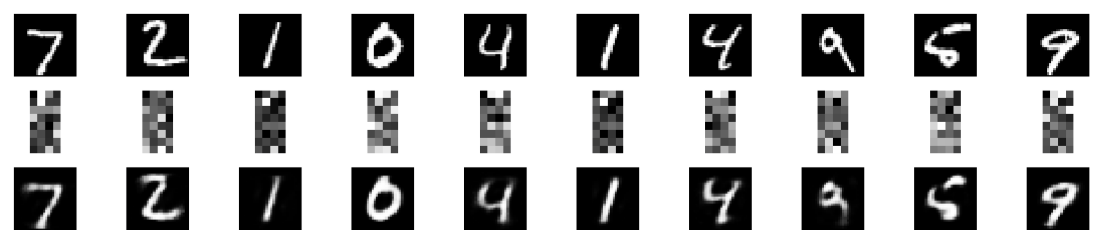

In [27]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()